In [1]:
from utils import * 

%load_ext autoreload
%autoreload 2

In [2]:
metat_df = metat_load()
metat_df = metat_df[(metat_df.reactor == 'n')].copy()

print('Num. ECE genes detected in any sample:',( metat_df[metat_df.genome_id == 'linear_ece_19kb'].groupby('gene_id').detected.sum() > 0).sum())
mcr_gene_ids = ['mp_18.1_2150', 'mp_18.1_2147']

interproscan_df = load_interproscan().rename(columns={'id':'gene_id'})
interproscan_df = interproscan_df[interproscan_df.e_value < 1e-5].copy()

Num. ECE genes detected in any sample: 28


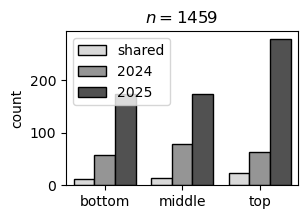

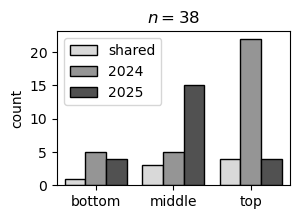

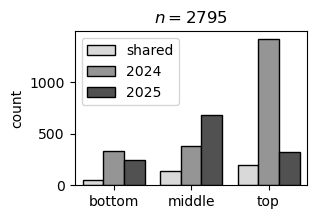

In [3]:
def plot_detected_genes(metat_df, genome_id:str='linear_ece_19kb'):

    fig, ax = plt.subplots(figsize=(3, 2)) 

    get_n_shared_genes = lambda df : len(np.intersect1d(df[(df.year == '2024') & (df.read_count > 0)].gene_id.unique(), df[(df.year == '2025') & (df.read_count > 0)].gene_id.unique()))

    metat_df = metat_df[(metat_df.reactor == 'n') & (metat_df.genome_id == genome_id)].copy()

    figure_df = list()
    for location, df in metat_df.groupby('location'):
        figure_df.append({'category':'shared', 'n':get_n_shared_genes(df), 'location':location})
        figure_df.append({'category':'2024', 'n':((df.year == '2024') & (df.read_count > 0)).sum(), 'location':location})
        figure_df.append({'category':'2025', 'n':((df.year == '2025') & (df.read_count > 0)).sum(), 'location':location})
    figure_df = pd.DataFrame(figure_df)
    n_total = metat_df.gene_id.nunique()

    sns.barplot(figure_df, y='n', x='location', hue='category', palette='Grays', ax=ax, edgecolor='black')
    ax.set_xlabel('')
    ax.set_ylabel('count')
    ax.get_legend().set_title('')
    ax.set_title(f'$n={n_total}$')
    plt.show()

plot_detected_genes(metat_df, genome_id='black_borg')
plot_detected_genes(metat_df, genome_id='linear_ece_19kb')
plot_detected_genes(metat_df, genome_id='mp_18')

In [4]:
annotations = dict()
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_2'] = 'unknown'
annotations['linear_ece_19kb.1_3'] = ''
annotations['linear_ece_19kb.1_4'] = ''
annotations['linear_ece_19kb.1_5'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_'] = ''
annotations['linear_ece_19kb.1_17'] = 'single-stranded DNA binding protein, DUF669 '
annotations['linear_ece_19kb.1_22'] = 'unknown'
annotations['linear_ece_19kb.1_31'] = 'unknown'

# https://www.ebi.ac.uk/interpro/entry/InterPro/IPR014722/protein/UniProt/
# https://pmc.ncbi.nlm.nih.gov/articles/PMC3140696/ 
annotations['linear_ece_19kb.1_37'] = 'likely RNA-binding, maybe rRNA'
annotations['linear_ece_19kb.1_'] = ''

plot_read_counts: Dropping 28 genes with no presence in any sample.


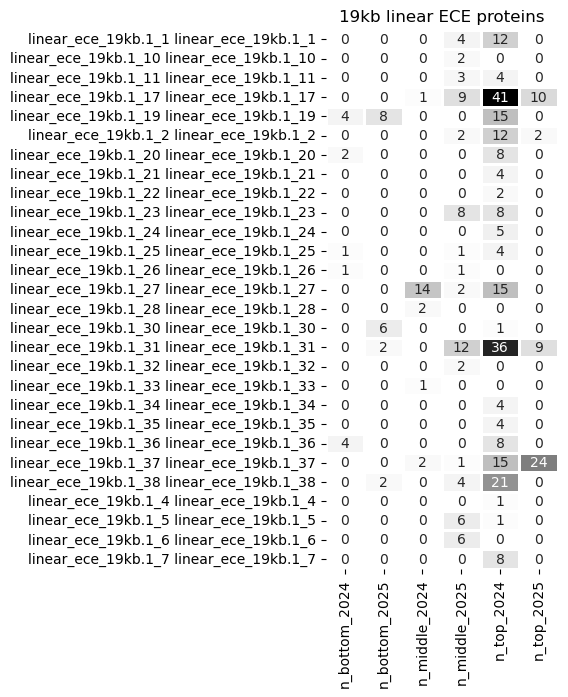

In [5]:
# If we are looking for genes whose transcription is regulated differently than the background transcription of the putative host, it
# seems reasonable to normalize with respect to putative host mcrAB. 

linear_ece_19kb_metat_df = metat_df[metat_df.genome_id == 'linear_ece_19kb'].copy()
linear_ece_19kb_metat_df['annotation'] = linear_ece_19kb_metat_df.gene_id.copy()
plot_read_counts(linear_ece_19kb_metat_df, title='19kb linear ECE proteins', drop_empty=True, figsize=(3, 7))

In [77]:
# Identify the potential capsid proteins on the Borgs. 
# subfam2354 and subfam1011 are profiled as viral capsid proteins, https://www.nature.com/articles/s41467-025-65646-7

# (1) BLACK-SR-VP_26_10_2019_C_40cm_scaffold_23_FINAL_IR_801_BLACK-SR-VP_26_10_2019_C_40cm_scaffold_23_FINAL_IR_SR-VP_26_10_2019_C_40cm___602689___603285___1_relaxed_rank_001_alphafold2_ptm_model_3_seed_000
# (2) BLACK-SR-VP_26_10_2019_C_40cm_scaffold_23_FINAL_IR_283_relaxed_rank_001_alphafold2_ptm_model_3_seed_000
# (3) BLACK-SR-VP_26_10_2019_C_40cm_scaffold_23_FINAL_IR_293_relaxed_rank_001_alphafold2_ptm_model_2_seed_000

# BLAST-aligned each of these sequences against the 2024 coassembly... 
# These are all on the second contig. 
# (1) SR-VP_05_06_2024_coassembly_scaffold_262_477 
# (2) SR-VP_05_06_2024_coassembly_scaffold_262_219
# (3) SR-VP_05_06_2024_coassembly_scaffold_262_209

# Confused because the paper marks the single jelly roll (SJR) major capsid protein as 801, and mentions high expression of 799, 800, and 801.
# Based on the spreadsheet, these are the following:
# (1) BLACK-SR-VP_26_10_2019_C_40cm_scaffold_23_FINAL_IR_798_BLACK-SR-VP_26_10_2019_C_40cm_scaffold_23_FINAL_IR_SR-VP_26_10_2019_C_40cm___601104___601415___1_relaxed_rank_001_alphafold2_ptm_model_4_seed_000
# (2) BLACK-SR-VP_26_10_2019_C_40cm_scaffold_23_FINAL_IR_799_BLACK-SR-VP_26_10_2019_C_40cm_scaffold_23_FINAL_IR_SR-VP_26_10_2019_C_40cm___601459___601776___1_relaxed_rank_001_alphafold2_ptm_model_3_seed_000
# (3) BLACK-SR-VP_26_10_2019_C_40cm_scaffold_23_FINAL_IR_800_relaxed_rank_001_alphafold2_ptm_model_2_seed_000
# (4) BLACK-SR-VP_26_10_2019_C_40cm_scaffold_23_FINAL_IR_801_BLACK-SR-VP_26_10_2019_C_40cm_scaffold_23_FINAL_IR_SR-VP_26_10_2019_C_40cm___602689___603285___1_relaxed_rank_001_alphafold2_ptm_model_3_seed_000

# Which map to the following proteins in the coassembly, which are all on the first scaffold.:
# (1) SR-VP_05_06_2024_coassembly_scaffold_129_493
# (2) SR-VP_05_06_2024_coassembly_scaffold_129_492
# (3) SR-VP_05_06_2024_coassembly_scaffold_129_491
# (4) SR-VP_05_06_2024_coassembly_scaffold_129_490

capsid_gene_ids = ['black_borg.2_477', 'black_borg.2_219', 'black_borg.2_209']
capsid_gene_ids = ['black_borg.1_490', 'black_borg.1_491', 'black_borg.1_492', 'black_borg.1_493']

In [70]:
metat_df[metat_df.genome_id == 'black_borg'].contig_id.unique()

array(['black_borg.1', 'black_borg.2', 'black_borg.3', 'black_borg.4'],
      dtype=object)

plot_read_counts: Dropping 4 genes with no presence in any sample.


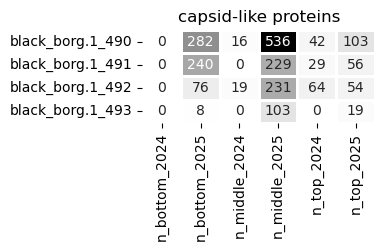

In [79]:
plot_read_counts(metat_df[metat_df.gene_id.isin(capsid_gene_ids)].copy(), title='capsid-like proteins', figsize=(3, 1.2))

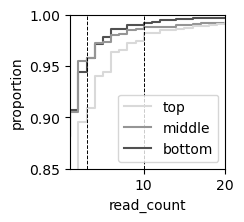

Total number of Black Borg genes: 1459
Total number of Black Borg genes detected in any sample: 573
Num. Black Borg genes in 2024 meeting the threshold: 60
Num. Black Borg genes in 2025 meeting the threshold: 56
Num. Black Borg genes meeting either threshold: 104


In [76]:
# What are the distribution of mapped reads on the Black Borg across samples?

location = 'middle'
year = '2025'

fig, ax = plt.subplots(figsize=(2, 2))
# figure_df = metat_df[(metat_df.genome_id == 'black_borg') & (metat_df.location == location)].copy()
figure_df = metat_df[(metat_df.genome_id == 'black_borg') & (metat_df.year == year)].copy()
sns.ecdfplot(figure_df, hue='location', x='read_count', palette='Grays')
ax.set_xlim(xmin=1, xmax=20)
ax.set_ylim(ymin=0.85)
ax.get_legend().set_title('')
ax.axvline(10, color='black', ls='--', lw=0.7)
ax.axvline(3, color='black', ls='--', lw=0.7)
ax.set_ylabel('proportion')
plt.show()

# Transcriptional activity is so low in the 2024 samples, but we cannot make any assumptions about if these are "true zeros" because 
# it is possible that high coverage is due to extracellular ECEs. What might be the most valid is to look at genes that might have been highly-expressed in 
# 2024 versus those which were highly-expressed in 2025. I think the bottom sample might be completely useless. 
print('Total number of Black Borg genes:', metat_df[metat_df.genome_id == 'black_borg'].gene_id.nunique())
print('Total number of Black Borg genes detected in any sample:', metat_df[(metat_df.genome_id == 'black_borg') & (metat_df.read_count > 0)].gene_id.nunique())
threshold_2024 = 3 # Don't want to go lower because mapped reads of 1 or 2 feels too random and not reflective of any actual activity. 
threshold_2025 = 8

mask_2024 = (metat_df.genome_id == 'black_borg') & (metat_df.year == '2024') & (metat_df.read_count > threshold_2024)
mask_2025 = (metat_df.genome_id == 'black_borg') & (metat_df.year == '2025') & (metat_df.read_count > threshold_2025)

# Gene sets are almost completely orthogonal!
print('Num. Black Borg genes in 2024 meeting the threshold:', metat_df[mask_2024].gene_id.nunique())
print('Num. Black Borg genes in 2025 meeting the threshold:', metat_df[mask_2025].gene_id.nunique())
print('Num. Black Borg genes meeting either threshold:', metat_df[mask_2024 | mask_2025].gene_id.nunique())

In [45]:
# black_borg_gene_ids = metat_df[mask_2024 | mask_2025].gene_id.unique()

diff_dfs = dict()
# I think I will need to do this on a sample-by-sample basis. 
for location, df in metat_df[metat_df.genome_id == 'black_borg'].groupby('location'):
    mask = ((df.year == '2024') & (df.read_count > threshold_2024))
    mask = mask | ((df.year == '2025') & (df.read_count > threshold_2025))
    gene_ids = df[mask].gene_id.unique()
    print(f'Num. genes in {location} passing the detection cutoffs:', len(gene_ids))
    diff_dfs[location] = metat_get_diff(df[df.gene_id.isin(gene_ids)].copy(), threshold=0, normalization='clr', location=location, genome_id='black_borg')

Num. genes in bottom passing the detection cutoffs: 24
Num. genes in middle passing the detection cutoffs: 46
Num. genes in top passing the detection cutoffs: 60


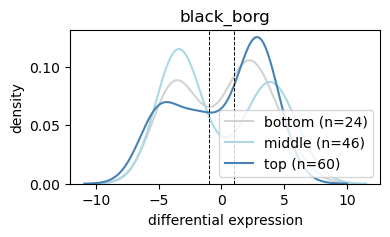

In [55]:
fig, ax = plt.subplots(figsize=(4, 2))

palette = {'bottom':'lightgray', 'middle':'lightblue', 'top':'steelblue'}
for location, df in diff_dfs.items():
    sns.kdeplot(df, x='diff', color=palette[location], label=f'{location} (n={len(df)})')

ax.set_ylabel('density')
ax.set_xlabel('differential expression')
ax.set_title('black_borg')
ax.axvline(1, ls='--', color='black', lw=0.7)
ax.axvline(-1, ls='--', color='black', lw=0.7)
ax.legend(loc='lower right')

plt.show()
# Basically amounts to assessing how orthogonal each set of genes is


In [60]:
location = 'top'

diff_df = diff_dfs[location]
diff_df = diff_df[diff_df['diff'] > 1].copy()
diff_df = diff_df.merge(interproscan_df.drop(columns=['genome_id']), on='gene_id', how='left')
print('Num. genes meeting threshold:', diff_df.gene_id.nunique())
print('Num. with no annotation:', diff_df[diff_df.signature_accession.isnull()].gene_id.nunique())
print('Num. with an InterPro description:', diff_df[(diff_df.interpro_description != '-') & (~diff_df.interpro_accession.isnull())].gene_id.nunique(), end='\n\n')

# for hmm, df in diff_df.groupby('signature_analysis', observed=True):
#     print(f'Num. with a {hmm} annotation:', df.gene_id.nunique())
diff_df = diff_df[['gene_id', 'location', 'diff', 'interpro_accession', 'interpro_description']].copy()
diff_df = diff_df.rename(columns={'interpro_accession':'accession', 'interpro_description':'annotation'})
diff_df = diff_df.drop_duplicates(['gene_id', 'accession'])
diff_df = diff_df[(diff_df.accession != '-') & (~diff_df.accession.isnull())].copy()

Num. genes meeting threshold: 29
Num. with no annotation: 9
Num. with an InterPro description: 19



In [68]:
for gene_id, df in diff_df.groupby('gene_id'):
    # print(f"annotations['top']['{gene_id}'] = ''")
    print(gene_id)
    print('\n'.join(df[~df.annotation.isnull()].annotation))
    print()

black_borg.1_109
Nucleophile aminohydrolases, N-terminal
SIS domain
SIS domain superfamily
Glucosamine-fructose-6-phosphate aminotransferase, isomerising
GlmS/FrlB, SIS domain 2
Glucosamine-fructose-6-phosphate aminotransferase, isomerising, N-terminal domain
GlmS/AgaS, SIS domain 1

black_borg.1_13
Immunoglobulin-like fold
von Willebrand factor A-like domain superfamily
Spermadhesin, CUB domain superfamily
von Willebrand factor, type A
Invasin/intimin cell-adhesion fragments
Calcium-activated chloride channel regulator
CUB domain

black_borg.1_167
Adenine-specific methyltransferase, domain 2
S-adenosyl-L-methionine-dependent methyltransferase superfamily
D12 class N6 adenine-specific DNA methyltransferase
Adenine modification methylase, M.EcoRV-type

black_borg.1_178
Tubulin/FtsZ, GTPase domain superfamily

black_borg.1_410
Histidine kinase/HSP90-like ATPase superfamily
Histidine kinase/HSP90-like ATPase domain
PAS domain
Signal transduction response regulator, receiver domain
Signal 

In [ ]:
# Genes up-regulated in the top sample (part of the 2025 spike)
annotations = dict()

annotations['top'] = dict()
# 

# Glucosamine-fructose-6-phosphate aminotransferase catalyses the first reaction in hexamine biosynthesis. It belongs to an 
# F-type group of glutamine-dependent amidotransferase family of enzymes, which utilise the glutamine amide nitrogen in the 
# biosynthesis of phosphoribosylamine, glutamate or asparagine. 
annotations['top']['black_borg.1_109'] = 'glucosamine-fructose-6-phosphate aminotransferase'
annotations['top']['black_borg.1_13'] = 'von Willebrand factor type A domain-containing protein, invasin/intimin cell-adhesion fragments'
annotations['top']['black_borg.1_167'] = 'adenine modification methylase'
annotations['top']['black_borg.1_178'] = 'tubulin/FtsZ GTPase domain-containing protein'
annotations['top']['black_borg.1_410'] = 'histidine kinase, HSP90-like'
annotations['top']['black_borg.1_556'] = 'DUF2173 domain-containing protein'
annotations['top']['black_borg.1_631'] = 'arsenical pump ATPase'
# Apparently associated with cellusomes and carbohydrate/polysaccharide degradation. 
annotations['top']['black_borg.1_664'] = 'CBM2/CBM3 carbohydrate-binding domain'
# https://www.cell.com/iscience/fulltext/S2589-0042(21)01039-7
# Probably involved in cellular adhesion. 
annotations['top']['black_borg.2_125'] = 'polysaccharide deacetylase'
annotations['top']['black_borg.2_150'] = 'xyloglucan-specific glycosyl hydrolase'
annotations['top']['black_borg.2_177'] = 'sialidase'
annotations['top']['black_borg.2_317'] = ''
annotations['top']['black_borg.2_329'] = ''
annotations['top']['black_borg.2_330'] = ''
annotations['top']['black_borg.2_372'] = ''
annotations['top']['black_borg.2_40'] = ''
annotations['top']['black_borg.2_433'] = ''
annotations['top']['black_borg.3_13'] = ''
annotations['top']['black_borg.3_29'] = ''

,gene_id,location,diff,accession,annotation
2,black_borg.1_109,top,2.563049,IPR029055,"Nucleophile aminohydrolases, N-terminal"
4,black_borg.1_109,top,2.563049,IPR001347,SIS domain
7,black_borg.1_109,top,2.563049,IPR046348,SIS domain superfamily
11,black_borg.1_109,top,2.563049,IPR005855,Glucosamine-fructose-6-phosphate aminotransfer...
13,black_borg.1_109,top,2.563049,IPR035490,"GlmS/FrlB, SIS domain 2"
...,...,...,...,...,...
146,black_borg.2_433,top,2.668409,IPR046357,Peptidyl-prolyl cis-trans isomerase domain sup...
147,black_borg.2_433,top,2.668409,IPR001179,FKBP-type peptidyl-prolyl cis-trans isomerase ...
151,black_borg.3_13,top,2.850731,IPR014721,Small ribosomal subunit protein uS5 domain 2-t...
152,black_borg.3_13,top,2.850731,IPR020568,Ribosomal protein uS5 domain 2-type superfamily


In [12]:
# interproscan_df[interproscan_df.signature_description.str.contains('capsid|coat|phage|DNA polymerase|histone', case=False) & (interproscan_df.genome_id == 'black_borg')]
interproscan_df[interproscan_df.signature_description.str.contains('histone|packaging', case=False) & (interproscan_df.genome_id == 'black_borg')]

,gene_id,md5,length,signature_analysis,signature_accession,signature_description,start,stop,e_value,status,date,interpro_accession,interpro_description,genome_id
2446,black_borg.1_104,baf07dc78604582470669976b82621fb,76,Gene3D,G3DSA:1.10.20.10,Histone-fold,9,73,6.900000e-21,T,02-01-2026,IPR009072,Histone-fold,black_borg
2444,black_borg.1_104,baf07dc78604582470669976b82621fb,76,Pfam,PF00808,Transcription factor CBF/NF-Y/archaeal histone...,9,70,1.900000e-13,T,02-01-2026,IPR003958,Transcription factor CBF/NF-Y/archaeal histone...,black_borg
2445,black_borg.1_104,baf07dc78604582470669976b82621fb,76,SUPERFAMILY,SSF47113,Histone-fold,7,73,1.410000e-17,T,02-01-2026,IPR009072,Histone-fold,black_borg
2447,black_borg.1_104,baf07dc78604582470669976b82621fb,76,PANTHER,PTHR47828,Archaeal histone HMF,8,73,1.000000e-24,T,02-01-2026,IPR050947,Archaeal histone HMF,black_borg


In [13]:
#  subfam2354 subfam1011